# 代币体系


* ## 模型设置

> 用户建模  
* 用户信息base  
* 行为behaviorbase, 定义每种行为，用户付出的行为量化值（时长，登陆次数，评论次数等）和获取的奖励
* action




In [1]:
import numpy as np
from scipy.stats import halfgennorm,gennorm

In [2]:
class behaviorBase:
    def __init__():
        return
    def generate_qty(self):
        # to be implemented
        return
    
    def generate_reward(self):
        # to be implemented
        return
    
    #行为量化值 如观看时间，登陆
    def getQty(self): 
        self.behavior_qty=self.generate_qty()
        return self.behavior_qty 

    def getReward(self):
        self.reward=self.generate_reward()
        return self.reward

#观看行为
class view(behaviorBase):
    def __init__(self,*rnd,size,exchange):
        self.size = size #日活数量
        self.rnd = rnd #模拟的指数分布参数
        self.exchange = exchange # 行为qty对应的奖励换算比例
        
    def generate_qty(self):
        r = np.random.exponential(*self.rnd,self.size)+1 #至少有1分钟
        self.qty = np.array(list(map(int,r))) #转化成int型
        return self.qty 
    
    def generate_reward(self):
        return self.qty *self.exchange

#首启-新用户
class firsttime_start(behaviorBase):
    def __init__(self,size,ratio,exchange):
        self.size = size*ratio #size*新用户比例
        self.exchange = exchange # 行为qty对应的奖励换算比例
        
    def generate_qty(self):
        self.qty = self.size #数量=每日新用户
        return self.qty 
    
    def generate_reward(self):
        return self.qty *self.exchange
    
#首次关注
class firstsub_start(behaviorBase):
    def __init__(self,size,ratio,exchange):
        self.size = size*ratio #size*首次关注的比例
        self.exchange = exchange # 行为qty对应的奖励换算比例
        
    def generate_qty(self):
        self.qty = self.size #数量=每日新用户
        return self.qty 
    
    def generate_reward(self):
        return self.qty *self.exchange
    
    
#评论
class comment(behaviorBase):
    def __init__(self,*rnd,size,exchange):
        self.rnd= rnd
        self.size =  size   
        self.exchange = exchange # 行为qty对应的奖励换算比例
        
    def generate_qty(self):
        r = np.random.exponential(*self.rnd,self.size) #评论呈现出指数分布，最多的是0
        self.qty = np.array(list(map(int,r))) #转化成int型
        return self.qty 
    
    def generate_reward(self):
        return self.qty *self.exchange

In [3]:
class actionBase:
    def __init__(self):
        return
    
    def call_act(self):
        #do actions
        return

In [4]:
class userBase(actionBase):
    def __init__(self,new_ratio):
        self.new_ratio = new_ratio
        
    def call_act():
        pass

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [6]:
# t = np.random.exponential(1,100)
# # sns.distplot(list(map(int,t)))
# sns.distplot(t)

In [7]:
# s=np.array(list(map(int,t)))
# sns.distplot(s)

In [8]:
DAU= 1000000

总时长:10526006,总奖励:210520


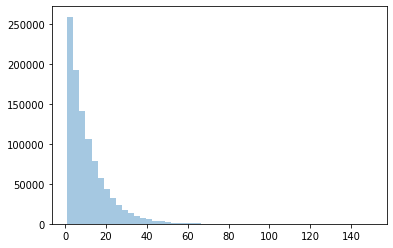

In [9]:
a=view((10,),size=DAU,exchange=0.02)
views = a.getQty()
views_rewards = a.getReward()
print('总时长:%d,总奖励:%d' %(views.sum(),views_rewards.sum()))
sns.distplot(views,kde=False)

In [11]:
views.shape

(1000000,)

In [349]:
pd.Series(views).describe()

count    1000000.000000
mean          10.497513
std            9.990660
min            1.000000
25%            3.000000
50%            7.000000
75%           14.000000
max          145.000000
dtype: float64

581892 116378.40000000002


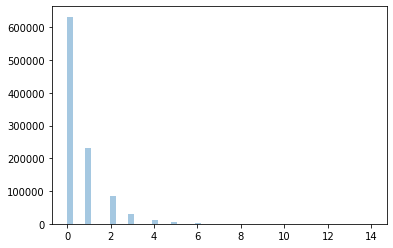

In [368]:
b=comment((1.0,),size=DAU,exchange=0.2)
comments = b.getQty()
comments_rewards = b.getReward()
print(comments.sum(),comments_rewards.sum())
sns.distplot(comments,kde=False)

In [351]:
pd.Series(comments).describe()

count    1000000.000000
mean           0.581498
std            0.960005
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           15.000000
dtype: float64

In [355]:
from scipy import optimize

In [363]:
c=np.array([2,3,-5])
A_ub=np.array([[-2,5,-1],[1,3,1]])
B_ub=np.array([-10,12])
A_eq=np.array([[1,1,1]])
B_eq=np.array([7])
x1=(0,100)
x2=(0,100)
x3=(0,7)
res=optimize.linprog(-c,A_ub,B_ub,A_eq,B_eq,bounds=(x1,x2,x3))
print(res)

     con: array([0.])
     fun: -14.571428571428571
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([0.        , 3.85714286])
  status: 0
 success: True
       x: array([6.42857143, 0.57142857, 0.        ])


In [413]:
x = np.linspace(0,100,100)

In [414]:
y = np.log(3+2*x)
y = np.exp(-10*x)

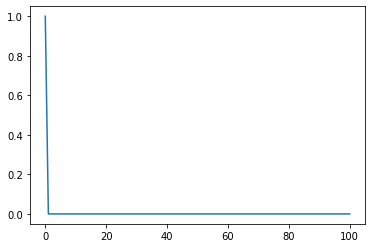

In [415]:
plt.plot(x,y)

In [416]:
np.random.exponential(10,10)

array([ 2.04571528, 32.22290026, 11.01366368, 10.82994786,  2.77600893,
        3.761561  , 22.96969816,  3.34054414,  0.83794107, 25.95941906])